## Installation

In [ ]:
!pip install wordcloud

In [ ]:
!pip install geopy 
!pip install Nominatim

  Created wheel for Nominatim: filename=nominatim-0.1-cp37-none-any.whl size=2363 sha256=f189d330c611da6405a491eb86d4273f8ae567927a0d7c8ed9ce28b1b834f4b2
  Stored in directory: /root/.cache/pip/wheels/d5/66/ed/e7476981dc30210b6b5ce7c25b054e8db35d44fdd2198003d4
Successfully built Nominatim


In [ ]:
!pip install langdetect
!pip install googletrans==3.1.0a0

     |████████████████████████████████| 983kB 2.9MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993223 sha256=e69e315b611171ec280e4a1cb9d3425a17f51ebdaf6a98c087dcfe34dc777e08
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7ddc6c92d3aa015cf1a498df5a70268996
Successfully built langdetect
     |████████████████████████████████| 61kB 1.9MB/s 
     |████████████████████████████████| 1.0MB 4.2MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-cp37-none-any.whl size=16368 sha256=a266b9affd89c20bc68ad0f4f5499f515d51b4b0bf4bfd4616f1c661fe4a908e
  Stored in directory: /root/.cache/pip/wheels/27/7a/a0/aff3babbb775549ce6813cb8fa7ff3c0848c4dc62c20f8fdac
Successfully built googletrans


In [ ]:
import sys
import pandas as pd
import os
import re
from wordcloud import WordCloud, ImageColorGenerator 
from PIL import Image
import time
import matplotlib.pyplot as plt
import numpy as np
from googletrans import Translator
from geopy.geocoders import Nominatim
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
import numpy as np
import pandas as pd
from datetime import datetime, timedelta 
from IPython.display import clear_output
import nltk
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
start_time = time.time()

In [ ]:
consumer_key = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api=tweepy.API(auth)

In [ ]:
query = '*'
max_requests = 20

In [ ]:
locations = ['Agra','Allahabad','Bareilly','Jhansi','Kanpur','Lucknow','Mathura','Meerut','Varanasi']

In [ ]:
def to_create(searched_tweets,city):
  data = []
  for tweet in searched_tweets:
      data.append([city,tweet.full_text])
  df = pd.DataFrame(data=data, columns=['city','text'])
  df.to_csv("All_District_Data.csv",mode = "a", header = False)
  #df.to_csv("Final_classification.csv",mode = "a", header = False)

In [ ]:
def geo(city):
  address= city
  geolocator = Nominatim(user_agent="Ambuj")
  location = geolocator.geocode(address)
  a = location.latitude, location.longitude
  #print(a)
  geo = str(a[0]) + "," + str(a[1]) + "," +"82km"
  #print(geo)
  #print(type(geo))
  searched_tweets = []
  last_id = -1
  request_count = 0
  while request_count < max_requests:
      try:
          new_tweets = api.search(q="*",
                                  lang='en',
                                  count=100,
                                  max_id=str(last_id - 1),
                                  tweet_mode='extended',
                                  geocode = geo)
          if not new_tweets:
              break
          searched_tweets.extend(new_tweets)
          last_id = new_tweets[-1].id
          request_count += 1
      except tweepy.TweepError as e:
          print(e)
          break
  to_create(searched_tweets,city)

for i in range(len(locations)):
  print(locations[i])
  geo(locations[i])

Agra
Allahabad
Bareilly
Jhansi
Kanpur
Lucknow
Mathura
Meerut
Varanasi


In [ ]:
name = ["City","Original_Text"]
df = pd.read_csv("All_District_Data.csv",names = name)

In [ ]:
grouped_df = df.groupby("City")
grouped_df = grouped_df.agg({"Original_Text": "nunique"})
grouped_df = grouped_df.reset_index()
print(grouped_df)

        City  Original_Text
0       Agra           1067
1  Allahabad           1280
2   Bareilly           1217
3     Jhansi           1088
4     Kanpur           1373
5    Lucknow           1445
6    Mathura            906
7     Meerut           1028
8   Varanasi           1295


In [ ]:
# counting the duplicates
dups = df.pivot_table(index = ['City', 'Original_Text'], aggfunc ='size')

# displaying the duplicate Series
print(dups)
dups.to_csv("All_District_Unique_Data.csv")

City      Original_Text                                                                                                                                                                                                                                                                                                   
Agra      "4 skills you should know" Great Explanation of by @championswimmer \nhttps://t.co/sJvAI4Krpx                                                                                                                                                                                                                       1
          "Even by righting this history publicly here, I am likely to be banned by Israel from returning to Palestine. But exile is just the price we pay to resist."\n\nAn informing piece by @jamal_nabulsi for @OverlandJournal. If you read anything today, read this! https://t.co/7s4PH11G9Z                           1
          "June 1, 2021" https://t.co/FNOrtQb

In [ ]:
df1 =pd.read_csv("All_District_Data.csv",names = name)

In [ ]:
df = pd.read_csv("All_District_Unique_Data.csv",names = name)

In [ ]:
df.describe()

Original_Text
count   10700.000000
mean        1.668411
std         5.412454
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       178.000000

In [ ]:
df1.describe()

City                                      Original_Text
count    17852                                              17852
unique       9                                               8079
top     Meerut  RT @dineshbjp09: I Request To All Nationalist ...
freq      2000                                                345

## Popular hashtags

In [ ]:
##df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sapio Analytics/Twitter/Varanasi Full Text - ultra final.csv")
#df = pd.read_excel("/content/Varanasi Full Text.xlsx")

In [ ]:

def hashtag_():
  hashtags = []
  for i in df1['Original_Text']:
  #i = i.rstrip("\n")
    i = str(i)
    v = i.split()
    #print(v)
    for j in v:
      if j[0] == "#":
        hashtags.append(j[1:])
        #print(j[1:])
  return hashtags

ha= hashtag_()
print(ha)

['bsc', 'bmb', 'binance', 'Blackday_…', 'cancelExamsSaveStudent', 'cancelcbse12thboar…', 'cancelb…', 'यूपी_के_शिक्षामित्रों_का_दर्द', 'Blackday_Release_UPPRT', 'Blackday_Release…', 'PrideMonth2021', 'Bitkeep', 'BitkeepOS', 'Blackday_Release_UPPRT', 'Blackday_Release_UPPRT', 'can…', 'Nifty', 'can…', 'Blackday_Release_UPPRT', 'wednesdaythought', 'Wednesdayvibe', 'WednesdayMotivation', 'Blackday_…', 'Blackday_Release_UPPRT', 'Blackday_Release…', 'ShauryaAurAnokhiKiKahani', 'Dvvnl020621MS', 'BTC', 'Blackday_Release_UPPRT', 'ShauryaAurAnokhiKiKahani', 'SriLanka', 'ThePlaceOfDevil', 'UnemployedWantUPPRT', 'पंचायतीराज_LDC2013', 'Rajasthan', 'StudentsDeserveBetter', 'cancelupboardexam2021', 'cancelup12thboardexams2021', 'पंचायतीराज_LDC2013', 'Rajasthan', 'StudentsDeserveBetter', 'cancelb…', 'Blackday_Release_UPPRT', 'Blackday_Release…', 'Dvvnl020621MS', 'कबीरजी_के_रहस्यमयीदोहे', 'KabirPrakatDiwas', 'UnemployedWantUPPRT', 'Blackday_Release_UPPRT', 'Blackday_Release_UPPRT', 'कबीरजी_के_रहस्यमयीदो

In [ ]:
def proc(hashtags):
  hasht = hashtags
  a = nltk.FreqDist(hasht)
  d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
  most_popular = (d[d["Count"]== max(d["Count"])])
  print("Most popular tweet",most_popular)
  print(hashtags)
  print(len(hashtags))
  a = dict(zip(d.Hashtag,d.Count))
  return a

a = proc(ha)
print("-----------------------------------------")
print(a)

Most popular tweet                    Hashtag  Count
29  कबीरजी_के_रहस्यमयीदोहे    691
['bsc', 'bmb', 'binance', 'Blackday_…', 'cancelExamsSaveStudent', 'cancelcbse12thboar…', 'cancelb…', 'यूपी_के_शिक्षामित्रों_का_दर्द', 'Blackday_Release_UPPRT', 'Blackday_Release…', 'PrideMonth2021', 'Bitkeep', 'BitkeepOS', 'Blackday_Release_UPPRT', 'Blackday_Release_UPPRT', 'can…', 'Nifty', 'can…', 'Blackday_Release_UPPRT', 'wednesdaythought', 'Wednesdayvibe', 'WednesdayMotivation', 'Blackday_…', 'Blackday_Release_UPPRT', 'Blackday_Release…', 'ShauryaAurAnokhiKiKahani', 'Dvvnl020621MS', 'BTC', 'Blackday_Release_UPPRT', 'ShauryaAurAnokhiKiKahani', 'SriLanka', 'ThePlaceOfDevil', 'UnemployedWantUPPRT', 'पंचायतीराज_LDC2013', 'Rajasthan', 'StudentsDeserveBetter', 'cancelupboardexam2021', 'cancelup12thboardexams2021', 'पंचायतीराज_LDC2013', 'Rajasthan', 'StudentsDeserveBetter', 'cancelb…', 'Blackday_Release_UPPRT', 'Blackday_Release…', 'Dvvnl020621MS', 'कबीरजी_के_रहस्यमयीदोहे', 'KabirPrakatDiwas', 'Unemploy

In [ ]:
#a = dict(zip(d.Hashtag,d.Count))
#print(a)

In [ ]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 21.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

    return "hsl({}, {}%, {}%)".format(h, s, l)

In [ ]:
def wordcloud(a):
  #upload or give path of cloud image
  # create a mask based on the image we wish to include
  my_mask = np.array(Image.open('/content/cloud2.png'))
  # create a wordcloud 
  wc = WordCloud(font_path='/content/Aparajita.ttf',
                scale=3,
                mask=my_mask,
                collocations=False, 
                color_func=random_color_func,
                background_color = 'white',
                min_font_size = 7, 
                max_font_size =40
                ).generate_from_frequencies(a)
  plt.figure(figsize=(40, 20))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis('off')
  wc.to_file('wordcloud3.png')
  plt.show()

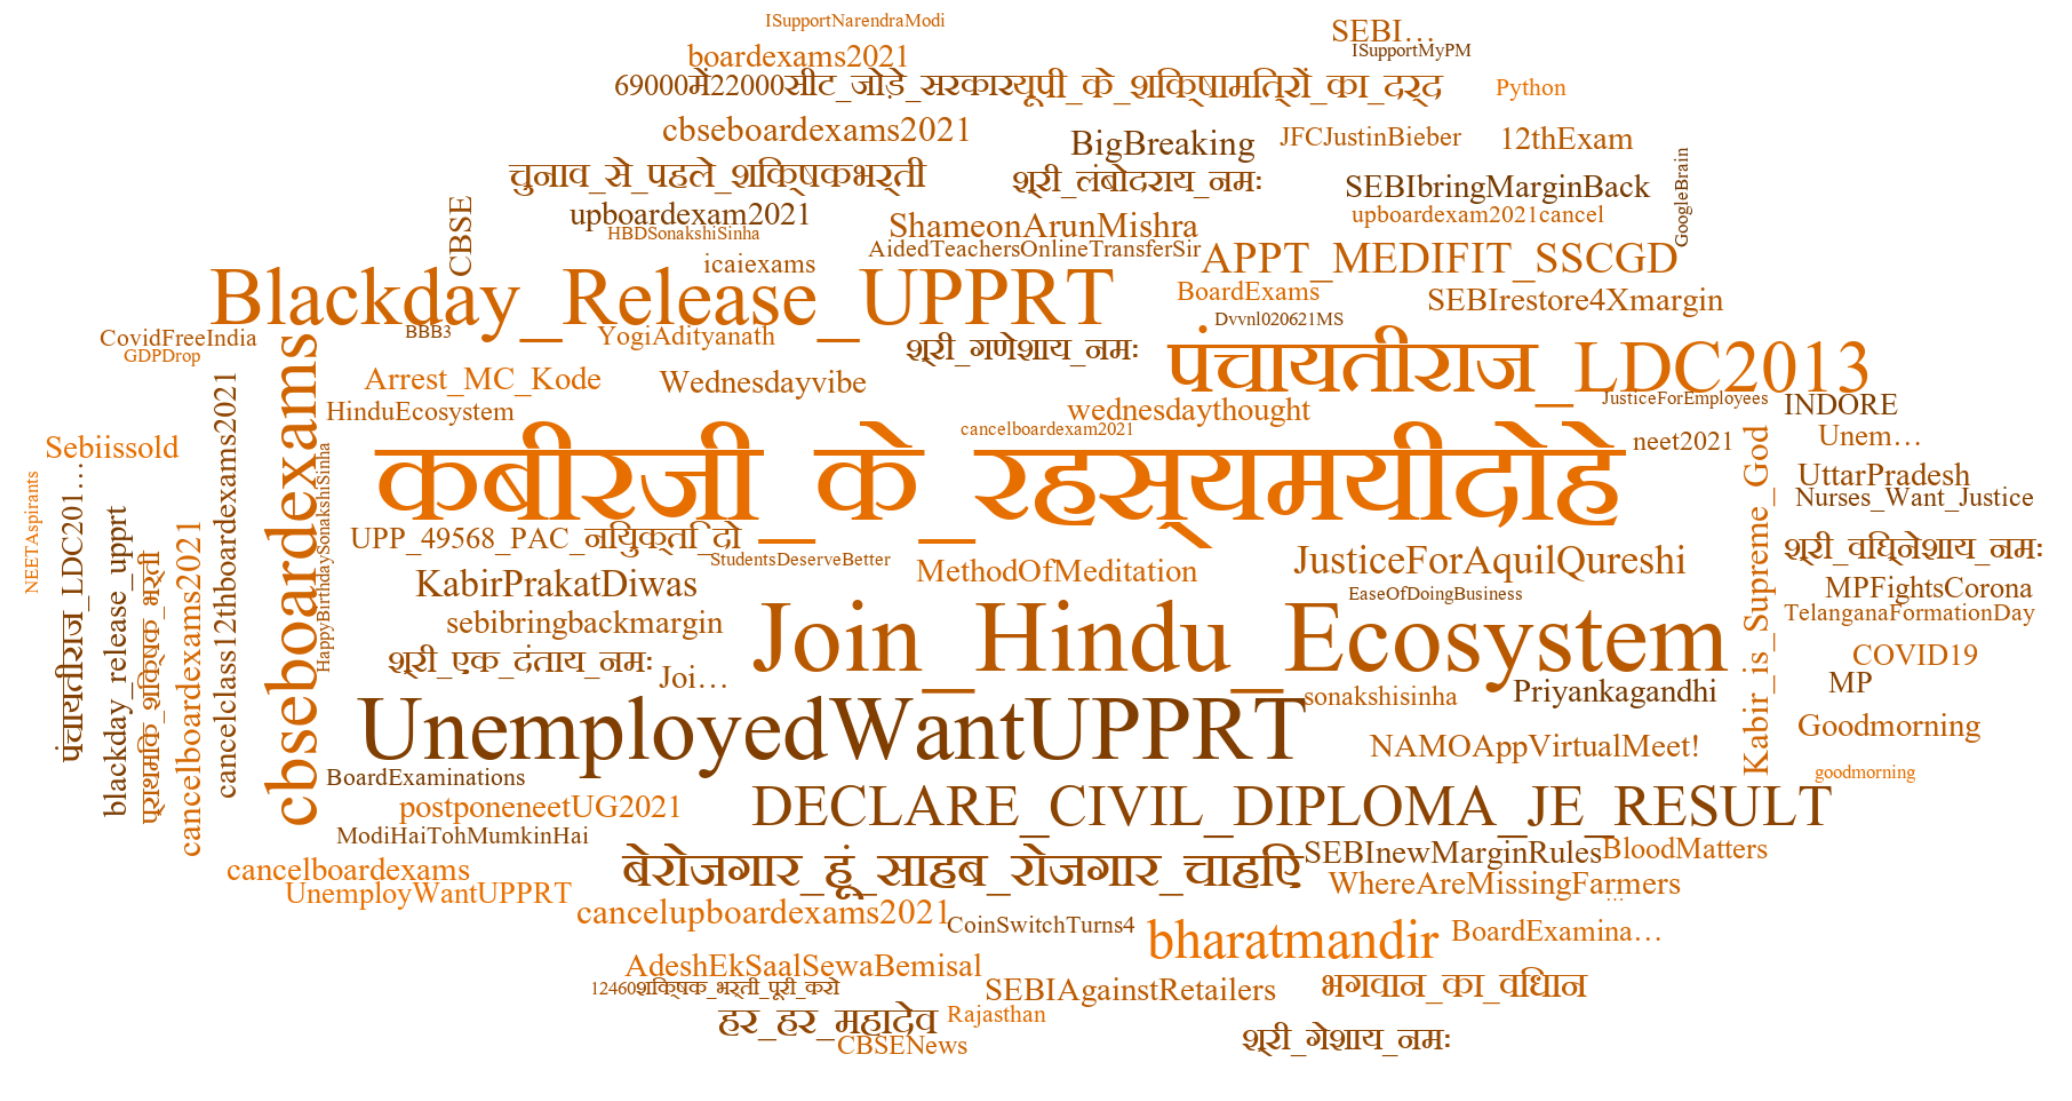

In [ ]:
wordcloud(a)

##location wordcloud

Enter the name of the city:Allahabad
Most popular tweet                 Hashtag  Count
0  Join_Hindu_Ecosystem    191
['Join_Hindu_Ecosystem', 'Join_Hindu_Ecosystem', 'Join_Hindu_Ecosystem', 'Join_Hindu_Ecosystem', 'Join_Hindu_Ecosystem', 'Join_Hindu_Ecosystem', 'Blackday_Release_UPPRT', 'Blackday_Release_UPPRT', 'Blackday_Release_UPPRT', 'Join_Hindu_Ecosystem', 'Goodmorning', 'Wednesdayvibe', 'Join_Hindu_Ecosystem', 'Join_Hindu_Ecosystem', 'Blackday_Release_UPPRT', 'quotes', 'UnemployedWantUPPRT', 'Join_Hindu_Ecosystem', 'UP69K_RELEASE_NEXT_MERIT_LIST', 'Join_Hindu_Ecosystem', 'IMA', 'BabaRamdev', 'Join_Hindu_Ecosystem', 'Join_Hindu_Ecosystem', 'Goodmorning', 'Wednesdayvibe', 'cancelboardexam', 'icaiexams', 'icai', 'ICAI', 'ca', 'CBSEclass12', 'icaiexamspostponement', 'caexams', 'NAMOAppVirtualMeet!', 'Join_Hindu_Ecosystem', 'AdeshEkSaalSewaBemisal', 'Join_Hindu_Ecosystem', 'Join_Hindu_Ecosystem', 'Join_Hindu_Ecosystem', 'NeverForget1984', 'WhereAreMissingFarmers', 'UnemployedWantUPPR

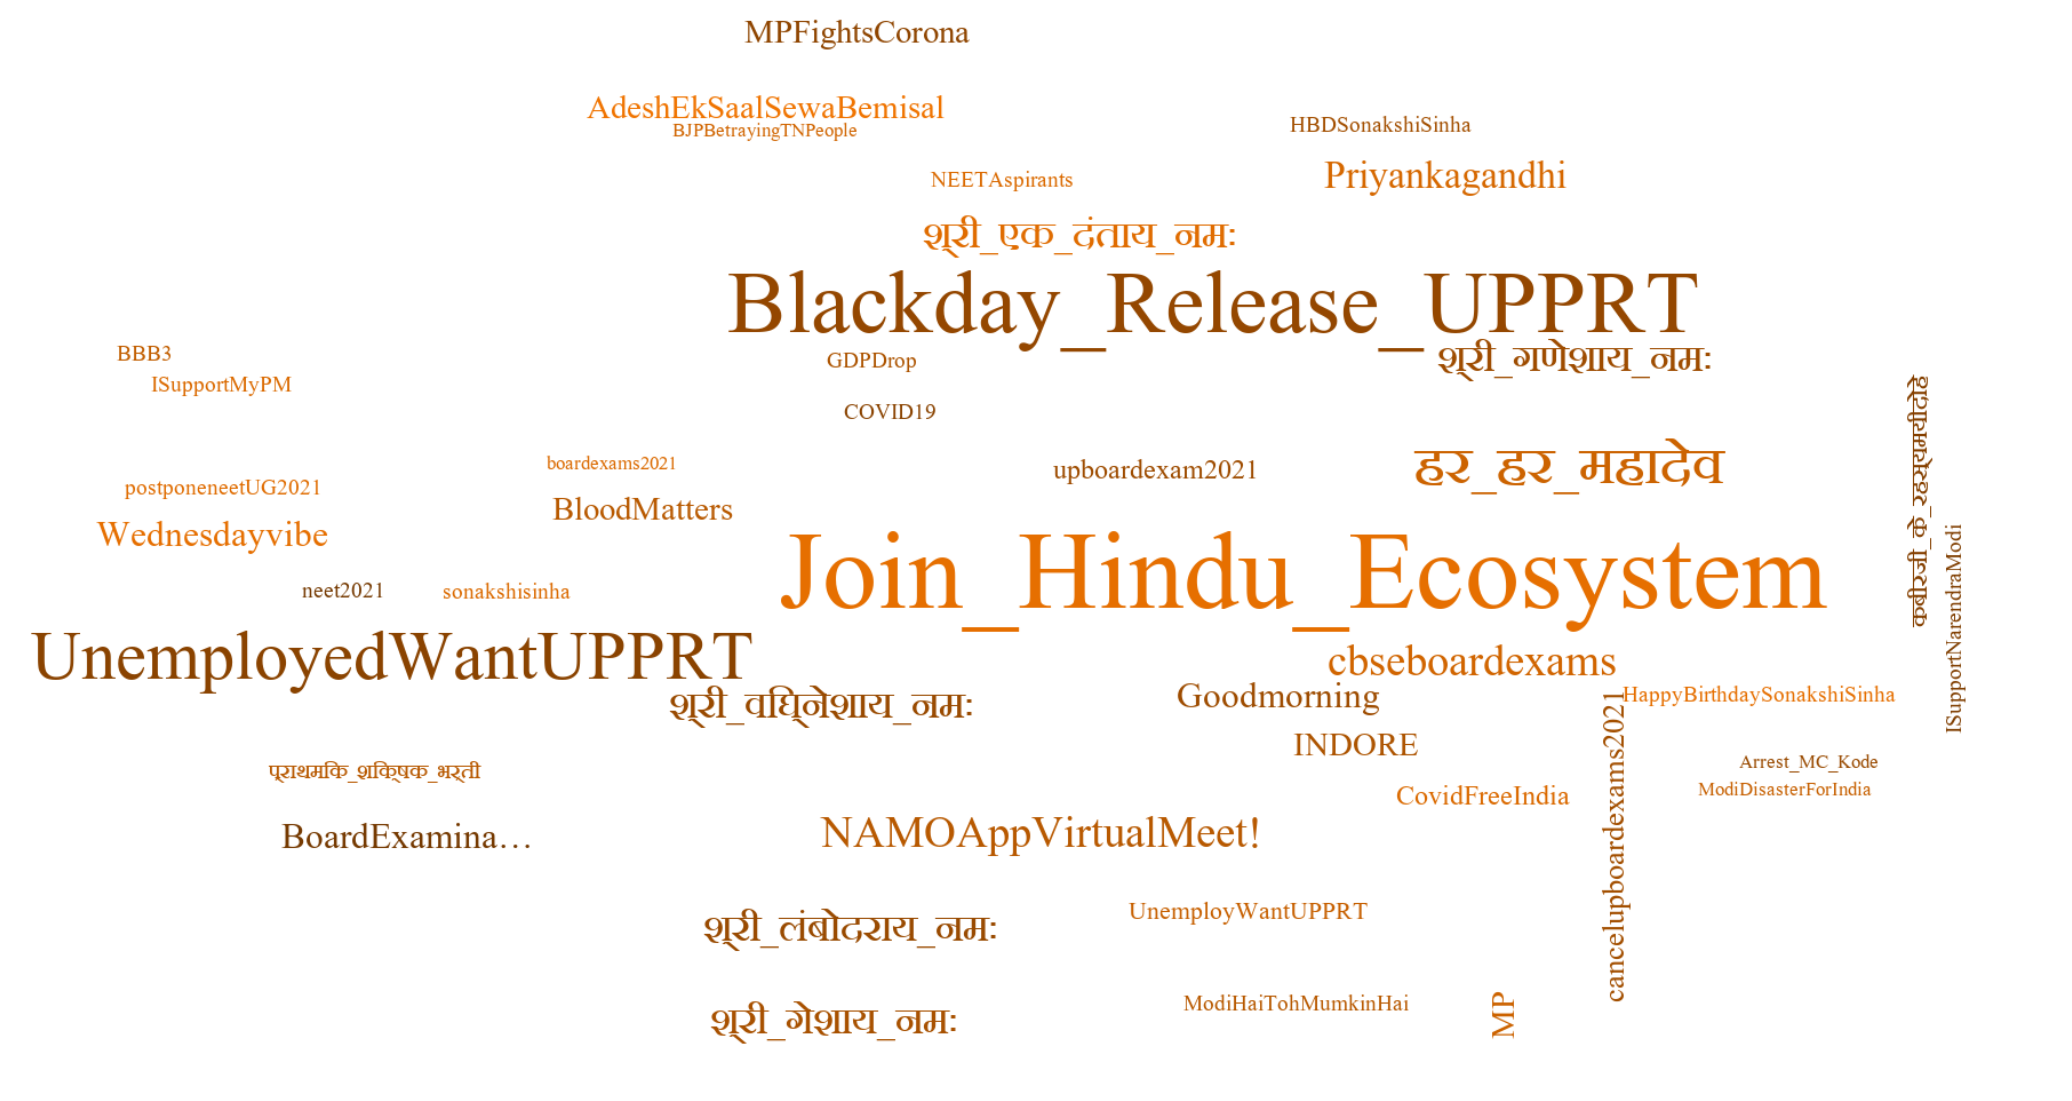

In [ ]:
#locations = ['Agra','Allahabad','Bareilly','Jhansi','Kanpur','Lucknow','Mathura','Meerut','Varanasi']


city_name = input("Enter the name of the city:")

df1 = df1[df1["City"]==city_name]
b = hashtag_()
a = proc(b)
wordcloud(a)

## Run main code

In [ ]:
df = pd.read_csv("All_District_Unique_Data.csv")

In [ ]:
df.head()

City                                      Original_Text  0
0  Agra  "4 skills you should know" Great Explanation o...  1
1  Agra  "Even by righting this history publicly here, ...  1
2  Agra             "June 1, 2021" https://t.co/FNOrtQbqri  1
3  Agra             "June 1, 2021" https://t.co/ab5rK4dtzF  1
4  Agra             "June 1, 2021" https://t.co/bWsKM4LRH1  1

In [ ]:
z = pd.DataFrame(columns = ['City','Original_text','Count','Pure_Text','emojis'])
z['City'] = df['City']
z['Count']= df['0']
z.head()

City Original_text  Count Pure_Text emojis
0  Agra           NaN      1       NaN    NaN
1  Agra           NaN      1       NaN    NaN
2  Agra           NaN      1       NaN    NaN
3  Agra           NaN      1       NaN    NaN
4  Agra           NaN      1       NaN    NaN

In [ ]:
j=0
for i in df['Original_Text']:

  z.at[j,'Original_text'] = i

  tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|((http|@)\S+)|('RT[\s]+')", " ", str(i)).split()) #removing hashtags and user handle
  pure_text = ' '.join(re.sub(r'[^\w\s,]',"", str(tweet)).split())
  z.at[j,'Pure_Text'] = pure_text

  emoji_summary = ' '.join(re.findall(r'[^\w\s,]',str(tweet)))
  #a = emoji_summary.replace("!()-[]{};:\, <>./?@#$%^&*_~","")
  z.at[j,'emojis'] = emoji_summary

  j=j+1

In [ ]:
z.head()


City  ...       emojis
0  Agra  ...          " "
1  Agra  ...  " . . " . !
2  Agra  ...          " "
3  Agra  ...          " "
4  Agra  ...          " "

[5 rows x 5 columns]

In [ ]:
twitter = z

In [ ]:
def polarity():
  j =0
  p=0
  ne = 0
  n = 0
  for i in twitter['Pure_Text']:
    analysis = TextBlob(str(i))
    if analysis.sentiment.polarity > 0:
      #1 for positive
      twitter.at[j,'Polarity'] = 1
      p = p+1
    elif analysis.sentiment.polarity == 0:
      #0 for neutral
      twitter.at[j,'Polarity'] = 0
      n = n+1
    else:
      #1 for negative
      twitter.at[j,'Polarity'] = -1
      ne = ne+1
    j=j+1

  print("Postitve Tweets" , float(p/j))
  print("Negative Tweets" , float(ne/j))
  print("Neutral Tweets" , float(n/j))

polarity()

Postitve Tweets 0.42321712309561643
Negative Tweets 0.11589868211982428
Neutral Tweets 0.46088419478455933


In [ ]:
#Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 
#Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. 
#Subjectivity is also a float which lies in the range of [0,1].

def getSubjectivity(text):
  return TextBlob(str(text)).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(str(text)).sentiment.polarity

#two new columns
twitter['Subjectivity'] = twitter['Pure_Text'].apply(getSubjectivity)
twitter['Polarity Ratio'] = twitter['Pure_Text'].apply(getPolarity)

In [ ]:

'''
def trans(i):
  translator = Translator()     
  v = translator.translate(str(i),src='hi',dest='en')
  print(v.text)
  return v.text 

twitter['Translate To English'] = twitter['Pure_Text'].apply(trans)
'''

The best way to predict the future is to create it
TOTAL GAINS 52 Trail sl 1630 11881815 HOLD 20 part Booked already 80 part
journey since March 20
_NRC is a mantra used by Hindutva regime everytime to divert us all when the system is about to collapse its a substitute to Mandir Wahin Banega Its oxygen for Hindutva ideology _in_india
nice song
Thank so much Amazon For this Quiz
Top Trends _ _Nirmal 01 _ _Sia _19_ _Student _Team
Respected CM Sir Only a big teacher recruitment in UP can bring back to power otherwise UP is so far from BJPgovt that they cant imagine it speech so helpless for all
Respected CM Sir Only a big teacher recruitment in UP can bring back to power otherwise UP is so far from BJPgovt that they cant imagine it speech so helpless for all plz Understand our feelings
Respected CM Sir Only a big teacher recruitment in UP can bring back to power otherwise UP is so far from BJPgovt that they cant imagine it speech so helpless for all
No 1 trend
O Guys _ you
_alok good news

In [ ]:
stop_words=[]
with open('/content/stopwords_all.txt','r') as file:   
    for line in file:   
        for word in line.split():
          stop_words.append(word)
print(stop_words)

['a', 'aadi', 'aaj', 'aap', 'aapne', 'aata', 'aati', 'aaya', 'aaye', 'ab', 'abbe', 'abbey', 'abe', 'abhi', 'able', 'about', 'above', 'accha', 'according', 'accordingly', 'acha', 'achcha', 'across', 'actually', 'after', 'afterwards', 'again', 'against', 'agar', 'ain', 'aint', "ain't", 'aisa', 'aise', 'aisi', 'alag', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'andar', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'ap', 'apan', 'apart', 'apna', 'apnaa', 'apne', 'apni', 'appear', 'are', 'aren', 'arent', "aren't", 'around', 'arre', 'as', 'aside', 'ask', 'asking', 'at', 'aur', 'avum', 'aya', 'aye', 'baad', 'baar', 'bad', 'bahut', 'bana', 'banae', 'banai', 'banao', 'banaya', 'banaye', 'banayi', 'banda', 'bande', 'bandi', 'bane', 'bani', 'bas', 'bata', 'batao', 'bc', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand',

In [ ]:
def remove_stopwords(text):
    no_stopword_text = [w for w in str(text).split() if not w in stop_words]
    return ' '.join(no_stopword_text)
  
#twitter['After Stopwards removal'] = twitter['Translate To English'].apply(lambda x: remove_stopwords(x))

twitter['After Stopwards removal'] = twitter['Pure_Text'].apply(lambda x: remove_stopwords(x))
twitter['After Stopwards removal'] = twitter['After Stopwards removal'].str.lower()


In [ ]:
#Reading form file
fileObj = open('/content/sports.txt', "r") 
sports = fileObj.read().splitlines() 
fileObj1 = open('/content/healthcare.txt', "r") 
health = fileObj1.read().splitlines()
fileObj2 = open('/content/politics.txt', "r") 
politics = fileObj2.read().splitlines()
fileObj3 = open('/content/tech.txt', "r") 
tech = fileObj3.read().splitlines()
fileObj4 = open('/content/entern.txt', "r") 
entern = fileObj4.read().splitlines()
fileObj5 = open('/content/business.txt', "r") 
business = fileObj5.read().splitlines()
fileObj6 = open('/content/education.txt', "r") 
education = fileObj6.read().splitlines()
fileObj.close()
fileObj1.close()
fileObj2.close()
fileObj3.close()
fileObj4.close()
fileObj5.close()

In [ ]:
print("Sports-  Bag of words",sports)
print("_---------------------------------")
print("Healthcare-  Bag of words",health)
print("_---------------------------------")
print("Politics-  Bag of words",politics)
print("_---------------------------------")
print("technology-  Bag of words",tech)
print("_---------------------------------")
print("Entertainment-  Bag of words",entern)
print("_---------------------------------")
print("Business-  Bag of words",business)
print("_---------------------------------")
print("Education-  Bag of words",education)
print("_---------------------------------")

Sports-  Bag of words ['sports', 'arche', 'arena', 'arrow', 'athlete', 'axel', 'badminton', 'bal', 'base', 'bat', 'batter', 'bicycle', 'bike', 'bocce', 'bow', 'box', 'canoe', 'catch', 'cleats', 'club', 'coach', 'compete', 'crew', 'cricket', 'cycle', 'cyclist', 'dart', 'defense', 'diamond', 'dive', 'diver', 'exercise', 'fencing', 'field', 'fitness', 'frisbee', 'game', 'gear', 'goal', 'goalie', 'golf', 'golfer', 'guard', 'gym', 'gymnast', 'helmet', 'hockey', 'home', 'hoop', 'hoops', 'ice', 'infield', 'inning', 'javelin', 'jog', 'judo', 'jump', 'jumper', 'karate', 'kayak', 'kite', 'lacrosse', 'league', 'lose', 'loser', 'major', 'mallet', 'mat', 'medal', 'mitt', 'move', 'net', 'offense', 'olympics', 'out', 'paddle', 'pitch', 'play', 'player', 'pole', 'polo', 'pool', 'puck', 'quarter', 'quiver', 'race', 'racer', 'referee', 'relay', 'ride', 'rink', 'row', 'rower', 'sail', 'score', 'scuba', 'skate', 'ski', 'skier', 'slalom', 'sled', 'sledder', 'snowboard', 'soccer', 'sport', 'squash', 'stadiu

In [ ]:
def classify(text):
  cfy ={0:"business",1:"tech",2:"politics",3:"sport",4:"entertainment",5:"healthcare",6:"education",7:"others"}
  #cfy ={0:"Industry",1:"tech",2:"politics",3:"sport",4:"entertainment",5:"heathcare"}
  text = str(text)
  text.lower()
  text = text.split(" ")
  s = 0
  h =0
  p =0
  t = 0
  e=0
  b =0
  ed = 0
  o = 0
  final = []
  for i in text:
    if i in sports:
      s=  s+1
    if i in business:
      b = b +1
    if i in health:
      h = h+1
    if i in politics:
      p = p+1
    if i in tech:
      t = t+1
    if i in entern:
      e = e+1
    if i in education:
      ed = ed+1
  final.extend([b,t,p,s,e,h,ed])
  if(max(final) >=2):
    res = final.index(max(final))
  else:
    res = 7
  print(cfy.get(res))
  return cfy.get(res)

In [ ]:
#twitter['After Stopwards removal'] = twitter['Translate To English'].apply(lambda x: remove_stopwords(x))
twitter['After Stopwards removal'] = twitter['Pure_Text'].apply(lambda x: remove_stopwords(x))

In [ ]:
twitter['After Stopwards removal'] = twitter['After Stopwards removal'].str.lower()

In [ ]:
twitter['Final Classification'] = twitter['After Stopwards removal'].apply(lambda x: classify(x))

Streaming output truncated to the last 5000 lines.
healthcare
others
others
healthcare
healthcare
others
others
politics
others
education
healthcare
others
others
healthcare
healthcare
business
healthcare
healthcare
healthcare
healthcare
healthcare
healthcare
tech
others
healthcare
others
others
healthcare
healthcare
others
education
others
healthcare
others
politics
healthcare
others
others
education
others
others
others
business
business
business
others
others
healthcare
healthcare
others
others
politics
others
healthcare
business
business
education
healthcare
others
sport
healthcare
others
others
healthcare
others
healthcare
healthcare
business
healthcare
healthcare
entertainment
others
healthcare
business
healthcare
tech
healthcare
healthcare
healthcare
healthcare
healthcare
healthcare
others
others
entertainment
others
healthcare
tech
healthcare
healthcare
tech
others
others
others
others
others
healthcare
sport
healthcare
others
others
others
others
others
others
healthcare
sport

In [ ]:
twitter['Final Classification'].value_counts()

others           4865
healthcare       4075
business          986
education         271
politics          222
tech              137
sport             105
entertainment      38
Name: Final Classification, dtype: int64

In [ ]:
twitter.to_csv("twitter_csv_final_final.csv")

In [ ]:
end_time = time.time()
print(f"Total time executed {end_time - start_time}")